# A - Mall Dataset

## 1 - Import Packages

In [ ]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from statsmodels.formula.api import ols

# For saving models
import pickle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv')

In [ ]:
df.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [ ]:
df.duplicated().sum()

0

1 số note khi điều tra sơ bộ:
*   Customer ID không cần dùng để đem vào điều tra dữ liệu sâu hơn
*   Biến đổi trường Gender thành nhị phân để sau dễ phân tích (0: Female, 1: Male)
*   Độ tuổi trung bình là 38, thu nhập trung bình hàng năm của khách hàng là $60K/Năm,  
*   Điểm tiêu dùng trung bình của khách hàng là 50.2





## 2 - EDA

### 2.1 - Check Outlier

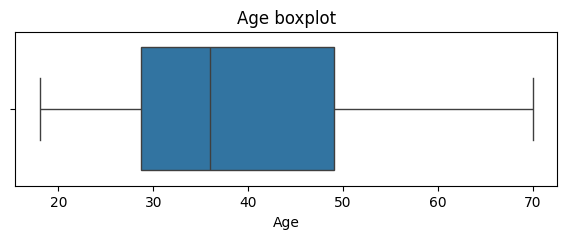

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Age'])
plt.title('Age boxplot')
plt.show()

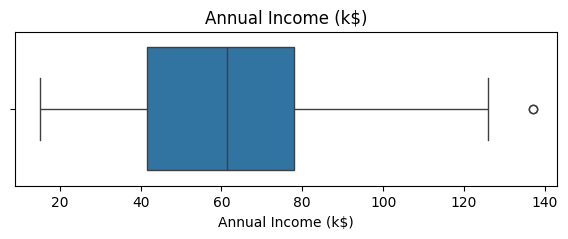

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

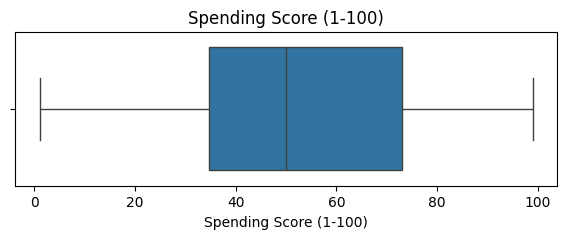

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')
plt.show()

Không có Outlier tác động đáng kể đến Dataset. Chuyển sang phân tích chi tiết

### 2.2 - Detailed EDA 1

In [ ]:
# Chuyển Categorical thành Numberic Data
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

<ipython-input-242-c94c312021b3>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [ ]:
import plotly.express as px

gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts,
             names='Gender',
             values='Count',
             title='Pie Chart of Customers by Gender',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Gender: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

Điều tra thêm về tỷ trọng phân bổ của các yếu tố: Tuổi, Thu nhập hằng năm, Điểm chi tiêu - Dựa theo giới tính

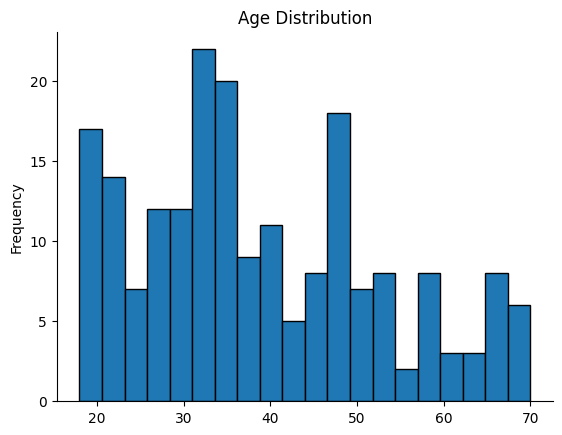

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

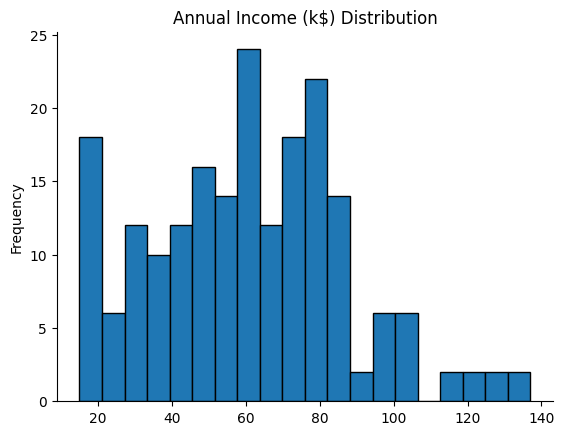

In [ ]:
from matplotlib import pyplot as plt
df['Annual Income (k$)'].plot(kind='hist', bins=20, title='Annual Income (k$) Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

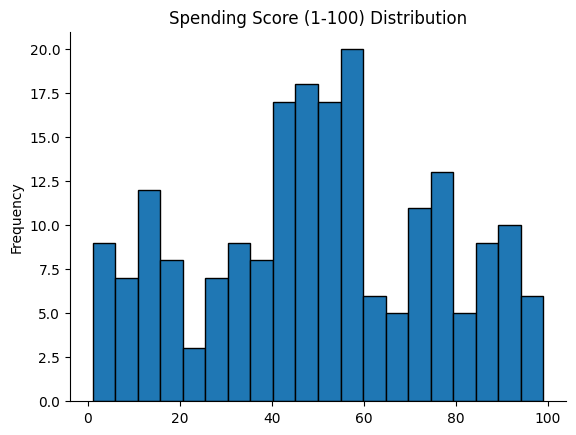

In [ ]:
from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100) Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2.3 - Detailed EDA 2

In [ ]:
# Bỏ cột ID vì chỉ mang tính chất định danh
df1 = df.drop(columns=["CustomerID"])

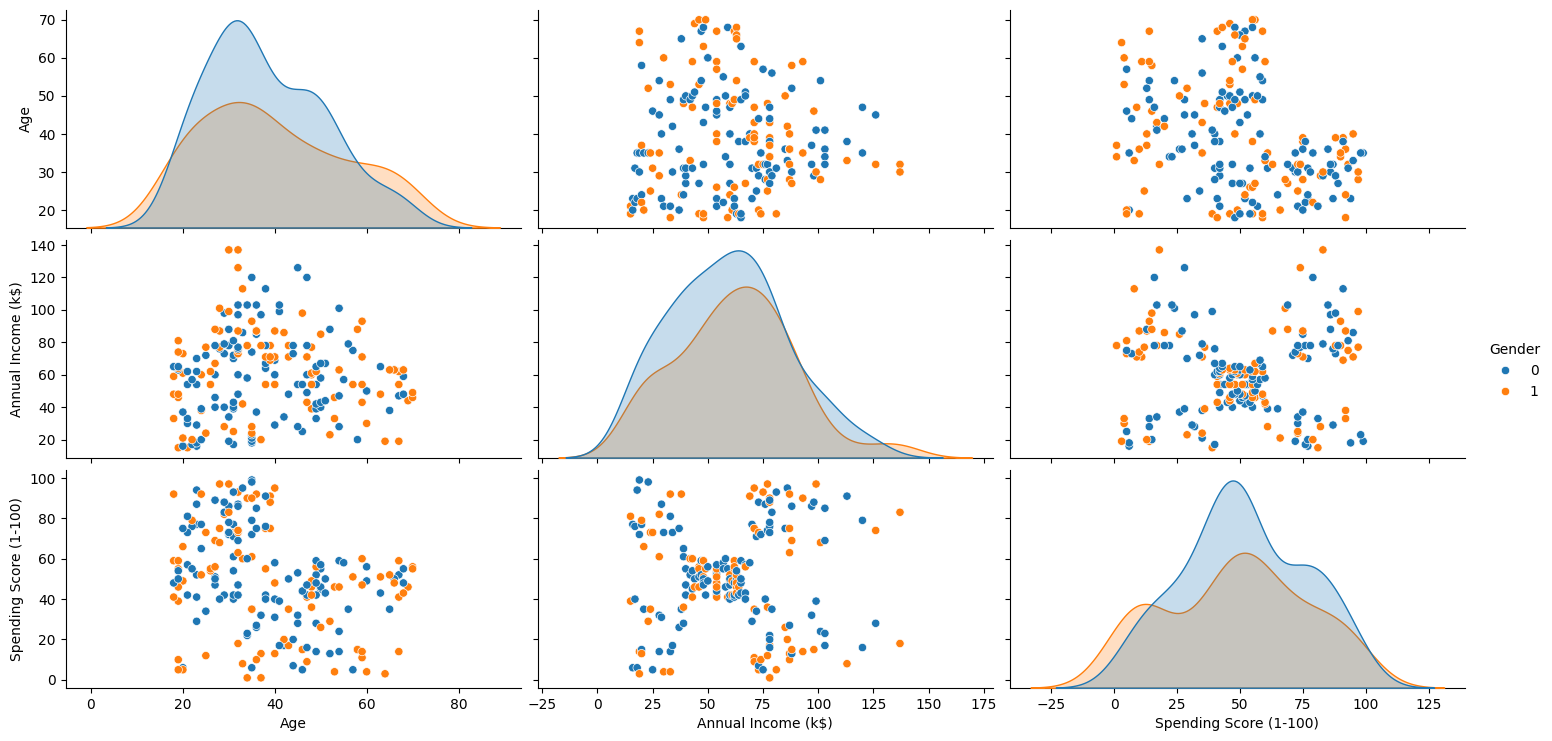

In [ ]:
# Vẽ Plot sự phân bổ của các biến khác theo Giới tính
sns.pairplot(df1, hue='Gender', aspect=2)
plt.show()

1 số note dựa trên các Plot đã vẽ ở trên:
*   Spending Score cao (>60) tập trung ở nhóm có thu nhập tiệm cận 25K và trên 75K. Ngoài ra Score cao cũng tập trung ở nhóm tuổi trước 40
*   Spending Score trung bình (40 - 60) tập trung ở nhóm có thu nhập trên 50K và dưới 75K và tuổi rải đều từ 20 đến 60, có điểm tập trung ở khoảng 40 tuổi








### 2.3.1 - Detailed EDA by Spending Score

Note chi tiết về Tuổi (Age): Khách hàng có điểm tiêu dùng cao (>60) tập trung ở độ tuổi từ 20 đến trước 40:

In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có điểm tiêu dùng cao (>60)
x1 = df.loc[df['Spending Score (1-100)'] > 60, 'CustomerID'].nunique()
x2 = df.loc[df['Spending Score (1-100)'] > 60, 'CustomerID'].nunique() / df['CustomerID'].nunique()
x3 = df.loc[df['Spending Score (1-100)'] > 60]['Annual Income (k$)'].mean()
x4 = df.loc[df['Spending Score (1-100)'] > 60]['Age'].mean()

print(f"Số lượng khách hàng có điểm tiêu dùng cao (>60): {x1}")
print(f"Tỷ trọng số lượng khách hàng có điểm  tiêu dùng cao (>60): {x2:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng cao là: ${x3:.3f}K/Year")
print(f"Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng cao là: {x4:.2f}")

Số lượng khách hàng có điểm tiêu dùng cao (>60): 62
Tỷ trọng số lượng khách hàng có điểm  tiêu dùng cao (>60): 31.00%
Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng cao là: $64.194K/Year
Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng cao là: 30.03


Thu nhập trung bình của nhóm khách hàng có điểm tiêu dùng cao lớn hơn 4K so với thu nhập trung bình của toàn bộ dataset (60K)

In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có điểm tiêu dùng từ 40 - 60
x5 = df.loc[(df['Spending Score (1-100)'] >= 40) & (df['Spending Score (1-100)'] <= 60), 'CustomerID'].nunique()
x6 = df.loc[(df['Spending Score (1-100)'] >= 40) & (df['Spending Score (1-100)'] <= 60), 'CustomerID'].nunique() / df['CustomerID'].nunique()
x7 = df.loc[(df['Spending Score (1-100)'] >= 40) & (df['Spending Score (1-100)'] <= 60)]['Annual Income (k$)'].mean()
x8 = df.loc[(df['Spending Score (1-100)'] >= 40) & (df['Spending Score (1-100)'] <= 60)]['Age'].mean()

print(f"Số lượng khách hàng có điểm tiêu dùng trong khoảng 40 - 60: {x5}")
print(f"Tỷ trọng số lượng khách hàng có điểm tiêu dùng trong khoảng 40 - 60: {x6:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng trong khoảng 40 - 60: ${x7:.3f}K/Year")
print(f"Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng trong khoảng 40 - 60: {x8:.2f}")

Số lượng khách hàng có điểm tiêu dùng trong khoảng 40 - 60: 79
Tỷ trọng số lượng khách hàng có điểm tiêu dùng trong khoảng 40 - 60: 39.50%
Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng trong khoảng 40 - 60: $54.608K/Year
Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng trong khoảng 40 - 60: 42.94


Thu nhập trung bình của nhóm có điểm tiêu dùng từ 40 - 60 ít hơn 6K so với thu nhập trung bình của toàn bộ dataset (60K)

In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có điểm tiêu dùng thấp (<40)
x9 = df.loc[df['Spending Score (1-100)'] < 40, 'CustomerID'].nunique()
x10 = df.loc[df['Spending Score (1-100)'] < 40, 'CustomerID'].nunique() / df['CustomerID'].nunique()
x11 = df.loc[df['Spending Score (1-100)'] < 40]['Annual Income (k$)'].mean()
x12 = df.loc[df['Spending Score (1-100)'] < 40]['Age'].mean()

print(f"Số lượng khách hàng có điểm tiêu dùng thấp (<40): {x9}")
print(f"Tỷ trọng số lượng khách hàng có điểm  tiêu dùng thấp (<40): {x10:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng thấp (<40) là: ${x11:.3f}K/Year")
print(f"Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng thấp (<40) là: {x12:.2f}")

Số lượng khách hàng có điểm tiêu dùng thấp (<40): 59
Tỷ trọng số lượng khách hàng có điểm  tiêu dùng thấp (<40): 29.50%
Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng thấp (<40) là: $64.712K/Year
Độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng thấp (<40) là: 42.64


Thu nhập trung bình của nhóm có điểm tiêu dùng dưới 40 cao hơn 4K so với thu nhập trung bình toàn dataset (60K)

=> Số lượng khách hàng chi tiêu ít hoặc vừa vừa tập trung ở nhóm trung niên - Tuổi trung bình 42 tuổi (Có thể đã có gia đình) nên sẽ có xu hướng chi tiêu tiết kiệm hơn

### 2.3.2 - Detailed EDA by Age

In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có độ tuổi từ 20 đến 30
a1 = df.loc[(df['Age'] >=20) & (df['Spending Score (1-100)'] <= 30), 'CustomerID'].nunique()
a2 = df.loc[(df['Age'] >=20) & (df['Spending Score (1-100)'] <= 30), 'CustomerID'].nunique() / df['CustomerID'].nunique()
a3 = df.loc[(df['Age'] >= 20) & (df['Age'] <= 30), 'Annual Income (k$)'].mean()
a4 = df.loc[(df['Age'] >= 20) & (df['Age'] <= 30), 'Spending Score (1-100)'].mean()

print(f"Số lượng khách hàng có độ tuổi từ 20 đến 30: {a1}")
print(f"Tỷ trọng số lượng khách hàng có độ tuổi từ 20 đến 30: {a2:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 20 đến 30: ${a3:.3f}K/Year")
print(f"Spending Score trung bình của nhóm khách hàng có độ tuổi từ 20 đến 30: {a4:.2f}")

Số lượng khách hàng có độ tuổi từ 20 đến 30: 44
Tỷ trọng số lượng khách hàng có độ tuổi từ 20 đến 30: 22.00%
Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 20 đến 30: $55.240K/Year
Spending Score trung bình của nhóm khách hàng có độ tuổi từ 20 đến 30: 64.52


In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có độ tuổi từ 31 đến 40
a5 = df.loc[(df['Age'] >=31) & (df['Spending Score (1-100)'] <= 40), 'CustomerID'].nunique()
a6 = df.loc[(df['Age'] >=31) & (df['Spending Score (1-100)'] <= 40), 'CustomerID'].nunique() / df['CustomerID'].nunique()
a7 = df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'Annual Income (k$)'].mean()
a8 = df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'Spending Score (1-100)'].mean()

print(f"Số lượng khách hàng có độ tuổi từ 31 đến 40: {a5}")
print(f"Tỷ trọng số lượng khách hàng có độ tuổi từ 31 đến 40: {a6:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 31 đến 40: ${a7:.3f}K/Year")
print(f"Spending Score trung bình của nhóm khách hàng có độ tuổi từ 31 đến 40: {a8:.2f}")

Số lượng khách hàng có độ tuổi từ 31 đến 40: 54
Tỷ trọng số lượng khách hàng có độ tuổi từ 31 đến 40: 27.00%
Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 31 đến 40: $68.633K/Year
Spending Score trung bình của nhóm khách hàng có độ tuổi từ 31 đến 40: 57.50


In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có độ tuổi từ 41 đến 50
a9 = df.loc[(df['Age'] >=41) & (df['Spending Score (1-100)'] <= 50), 'CustomerID'].nunique()
a10 = df.loc[(df['Age'] >=41) & (df['Spending Score (1-100)'] <= 50), 'CustomerID'].nunique() / df['CustomerID'].nunique()
a11 = df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'Annual Income (k$)'].mean()
a12 = df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'Spending Score (1-100)'].mean()

print(f"Số lượng khách hàng có độ tuổi từ 41 đến 50: {a9}")
print(f"Tỷ trọng số lượng khách hàng có độ tuổi từ 41 đến 50: {a10:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 41 đến 50: ${a11:.3f}K/Year")
print(f"Spending Score trung bình của nhóm khách hàng có độ tuổi từ 41 đến 50: {a12:.2f}")

Số lượng khách hàng có độ tuổi từ 41 đến 50: 60
Tỷ trọng số lượng khách hàng có độ tuổi từ 41 đến 50: 30.00%
Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 41 đến 50: $63.605K/Year
Spending Score trung bình của nhóm khách hàng có độ tuổi từ 41 đến 50: 34.39


In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có độ tuổi từ 51 đến 60
a13 = df.loc[(df['Age'] >=51) & (df['Spending Score (1-100)'] <= 60), 'CustomerID'].nunique()
a14 = df.loc[(df['Age'] >=51) & (df['Spending Score (1-100)'] <= 60), 'CustomerID'].nunique() / df['CustomerID'].nunique()
a15 = df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'Annual Income (k$)'].mean()
a16 = df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'Spending Score (1-100)'].mean()

print(f"Số lượng khách hàng có độ tuổi từ 51 đến 60: {a13}")
print(f"Tỷ trọng số lượng khách hàng có độ tuổi từ 51 đến 60: {a14:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 51 đến 60: ${a15:.3f}K/Year")
print(f"Spending Score trung bình của nhóm khách hàng có độ tuổi từ 51 đến 60: {a16:.2f}")

Số lượng khách hàng có độ tuổi từ 51 đến 60: 40
Tỷ trọng số lượng khách hàng có độ tuổi từ 51 đến 60: 20.00%
Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 51 đến 60: $56.696K/Year
Spending Score trung bình của nhóm khách hàng có độ tuổi từ 51 đến 60: 32.52


In [ ]:
# Viết thêm code tính toán về số lượng khách hàng có độ tuổi trên 60
a13 = df.loc[(df['Age'] >60), 'CustomerID'].nunique()
a14 = df.loc[(df['Age'] > 60), 'CustomerID'].nunique() / df['CustomerID'].nunique()
a15 = df.loc[(df['Age'] > 60), 'Annual Income (k$)'].mean()
a16 = df.loc[(df['Age'] > 60), 'Spending Score (1-100)'].mean()

print(f"Số lượng khách hàng có độ tuổi trên 60: {a13}")
print(f"Tỷ trọng số lượng khách hàng có độ tuổi trên 60: {a14:.2%}")
print(f"Thu nhập trung bình hàng năm của khách hàng có độ tuổi trên 60: ${a15:.3f}K/Year")
print(f"Spending Score trung bình của nhóm khách hàng có độ tuổi trên 60: {a16:.2f}")

Số lượng khách hàng có độ tuổi trên 60: 17
Tỷ trọng số lượng khách hàng có độ tuổi trên 60: 8.50%
Thu nhập trung bình hàng năm của khách hàng có độ tuổi trên 60: $50.000K/Year
Spending Score trung bình của nhóm khách hàng có độ tuổi trên 60: 44.18


Thu nhập trung bình hằng năm của khách hàng chạm đỉnh ở độ tuổi 31 - 40 (68K) và độ tuổi 41 - 50 (63K), sau đó giảm dần về mức ngưỡng dưới 60K theo độ tuổi tăng dần

### 2.3.3 - Detailed EDA by Gender

Note cho mục 2.3.3: Sẽ chỉ note thêm những gì mới hơn so với mục 2.3.2
*   Thu nhập trung bình hằng năm của Nam (62.22K) cao hơn so với Nữ (59.25K)
*   Điểm tiêu dùng của Nữ xấp xỉ (51.52) và cao hơn so với điểm tiêu dùng của Nam (48.51)



##### 2.3.3.1 - Women

In [ ]:
# Filter Women Only (Gender = 0)
df2 = df[df['Gender'] == 0]

In [ ]:
df2.drop_duplicates()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
5             6       0   22                  17                      76
6             7       0   35                  18                       6
..          ...     ...  ...                 ...                     ...
191         192       0   32                 103                      69
193         194       0   38                 113                      91
194         195       0   47                 120                      16
195         196       0   35                 120                      79
196         197       0   45                 126                      28

[112 rows x 5 columns]

In [ ]:
df2 = df2.drop(columns=["CustomerID"])

In [ ]:
df2.describe()

Gender         Age  Annual Income (k$)  Spending Score (1-100)
count   112.0  112.000000          112.000000              112.000000
mean      0.0   38.098214           59.250000               51.526786
std       0.0   12.644095           26.011952               24.114950
min       0.0   18.000000           16.000000                5.000000
25%       0.0   29.000000           39.750000               35.000000
50%       0.0   35.000000           60.000000               50.000000
75%       0.0   47.500000           77.250000               73.000000
max       0.0   68.000000          126.000000               99.000000

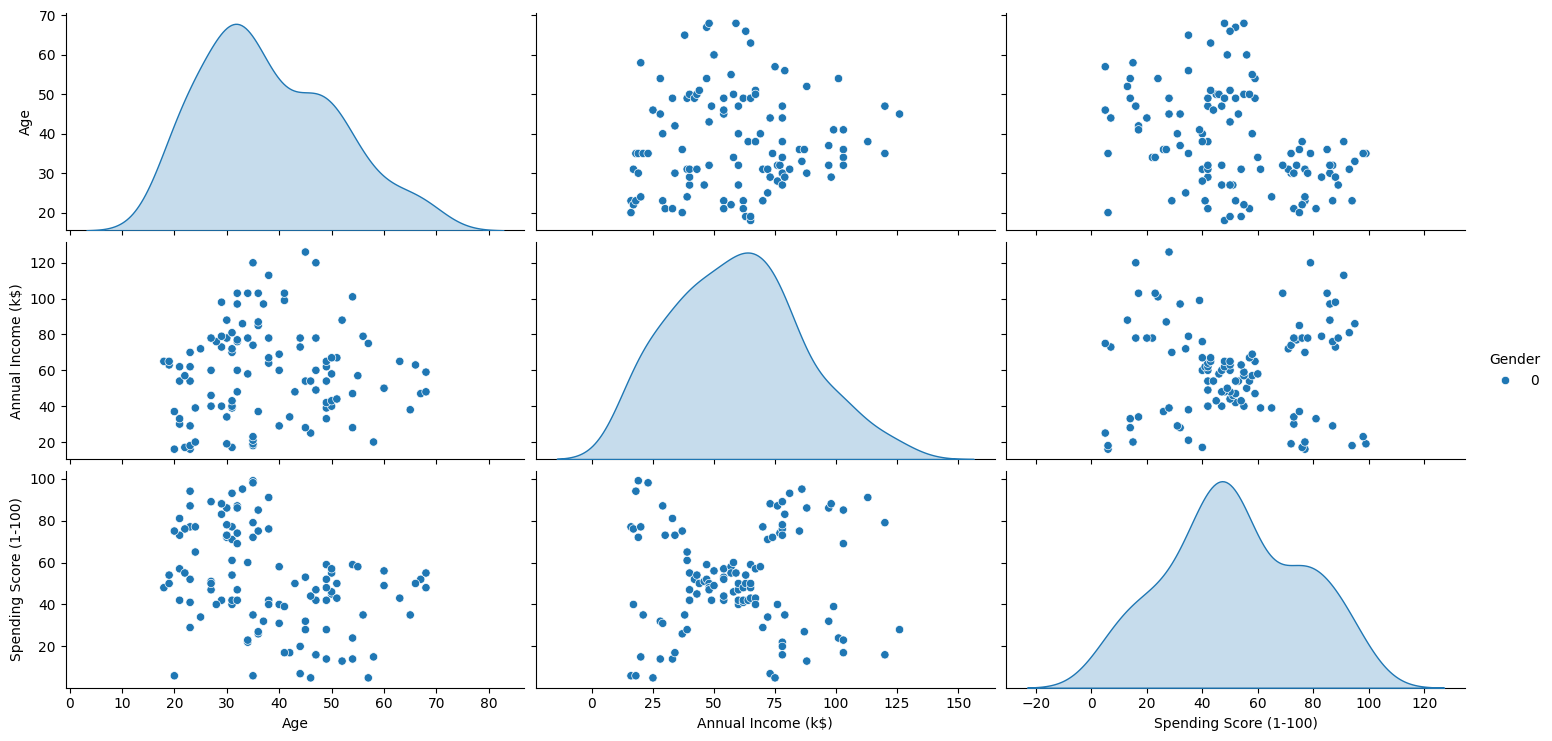

In [ ]:
# Vẽ Plot sự phân bổ của các biến khác theo Giới tính
sns.pairplot(df2, hue='Gender', aspect=2)
plt.show()

##### 2.3.3.2 - Men

In [ ]:
# Filter Man Only (Gender = 0)
df3 = df[df['Gender'] == 1]

In [ ]:
df3.drop_duplicates()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
8             9       1   64                  19                       3
10           11       1   67                  19                      14
14           15       1   37                  20                      13
..          ...     ...  ...                 ...                     ...
187         188       1   28                 101                      68
192         193       1   33                 113                       8
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[88 rows x 5 columns]

In [ ]:
df3 = df3.drop(columns=["CustomerID"])

In [ ]:
df3.describe()

Gender        Age  Annual Income (k$)  Spending Score (1-100)
count    88.0  88.000000           88.000000               88.000000
mean      1.0  39.806818           62.227273               48.511364
std       0.0  15.514812           26.638373               27.896770
min       1.0  18.000000           15.000000                1.000000
25%       1.0  27.750000           45.500000               24.500000
50%       1.0  37.000000           62.500000               50.000000
75%       1.0  50.500000           78.000000               70.000000
max       1.0  70.000000          137.000000               97.000000

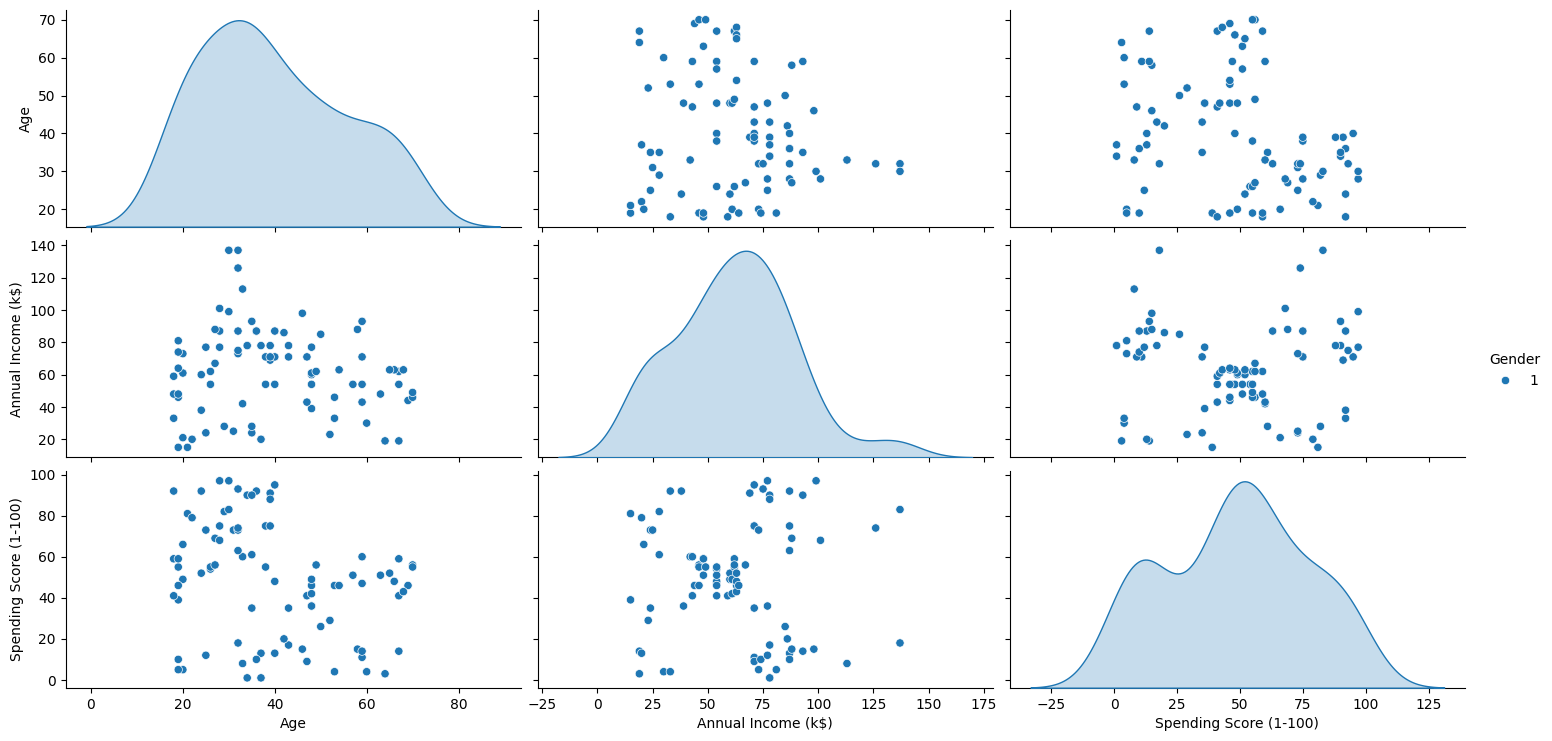

In [ ]:
# Vẽ Plot sự phân bổ của các biến khác theo Giới tính
sns.pairplot(df3, hue='Gender', aspect=2)
plt.show()

### 2.4 - Correlation Heatmap

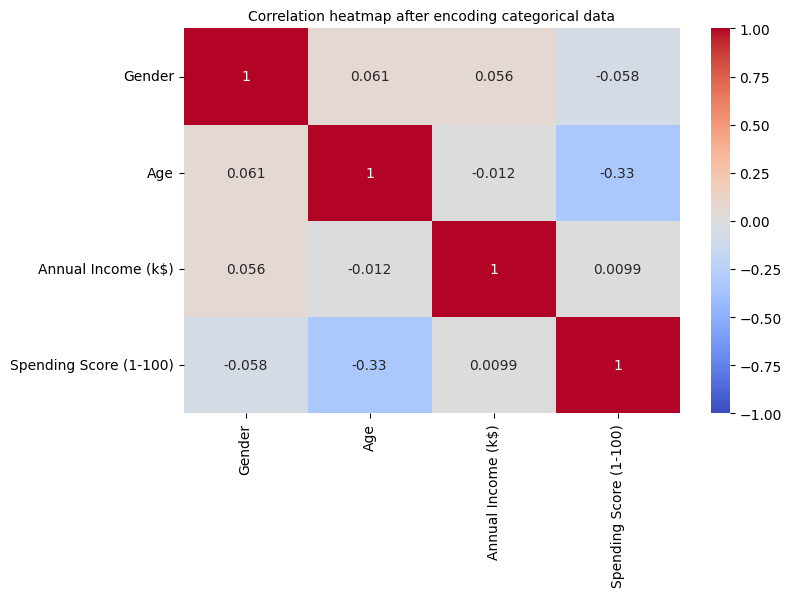

In [ ]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(8,5))
corr_matrix = df1.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

1 số note dựa trên Correlation Map đã vẽ:
*   Thu nhập có xu hướng giảm dần theo độ tuổi
*   Các yếu tố còn lại có xu hướng tương quan khá ít (< 0.5)





## 3 - Clustering

### 3.1 - Clustering using Age & Spending Score

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['Age' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



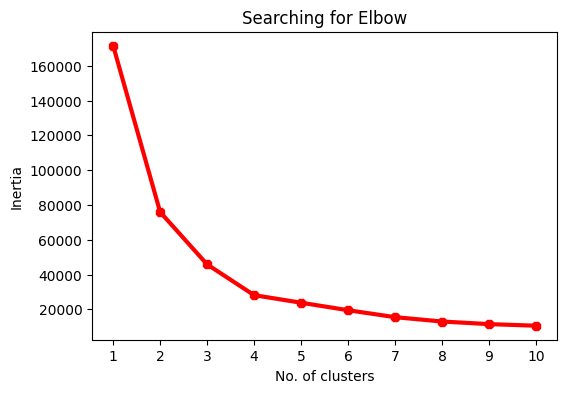

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X1)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.4692
Với n_clusters = 3, Điểm trung bình silhouette score là 0.4530
Với n_clusters = 4, Điểm trung bình silhouette score là 0.4997
Với n_clusters = 5, Điểm trung bình silhouette score là 0.4477
Với n_clusters = 6, Điểm trung bình silhouette score là 0.4044
Với n_clusters = 7, Điểm trung bình silhouette score là 0.3930
Với n_clusters = 8, Điểm trung bình silhouette score là 0.3981
Với n_clusters = 9, Điểm trung bình silhouette score là 0.3740
Với n_clusters = 10, Điểm trung bình silhouette score là 0.3932


Chọn Cluster = 5 dựa trên 2 phương pháp Elbow và Silhouete

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-275-7b3fe0452c73>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Spending Score (1-100)  Label
0   19                      39      3
1   21                      81      1
2   20                       6      2
3   23                      77      1
4   31                      40      3

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

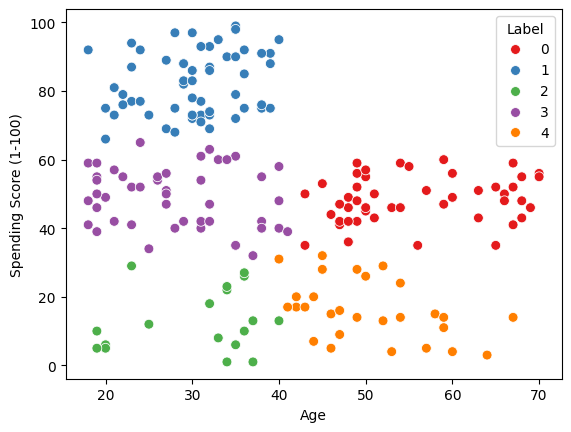

In [ ]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X1, hue='Label', s=50, palette='Set1')

*   Nhóm Xanh nước biển: Độ tuổi từ 20 đến hơn 30 có điểm tiêu dùng từ tiệm cận 80 trở lên
*   Nhóm Tím: Độ tuổi từ 20 - 30 có điểm tiêu dùng trong ngưỡng 40 - 60
*   Nhóm Đỏ: Độ tuổi từ 50 - 70 có điểm tiêu dùng trong ngưỡng 40 - 60
*   Nhóm Xanh lá cây:Độ tuổi từ 20 - 30 có điểm tiêu dùng dưới 40
*   Nhóm Cam (Orange): Độ tuổi từ 50 - 70 có điểm tiêu dùng dưới 40


### 3.2 - Clustering using Spending Score & Annual Income

In [ ]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



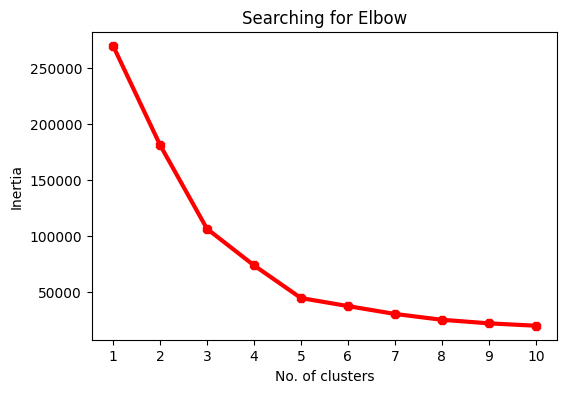

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X2)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.3956
Với n_clusters = 3, Điểm trung bình silhouette score là 0.4676
Với n_clusters = 4, Điểm trung bình silhouette score là 0.4938
Với n_clusters = 5, Điểm trung bình silhouette score là 0.5539
Với n_clusters = 6, Điểm trung bình silhouette score là 0.5128
Với n_clusters = 7, Điểm trung bình silhouette score là 0.5017
Với n_clusters = 8, Điểm trung bình silhouette score là 0.4963
Với n_clusters = 9, Điểm trung bình silhouette score là 0.4559
Với n_clusters = 10, Điểm trung bình silhouette score là 0.4426


Chọn Cluster = 5 dựa trên 2 phương pháp Elbow và Silhouete

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X2)
y = km.predict(X2)
X2['Label'] = y
X2.head()

<ipython-input-281-5af1be1d0ef4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Annual Income (k$)  Spending Score (1-100)  Label
0                  15                      39      1
1                  15                      81      4
2                  16                       6      1
3                  16                      77      4
4                  17                      40      1

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

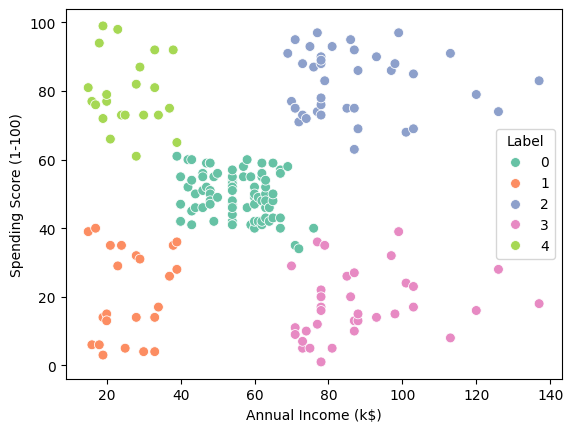

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X2, hue='Label', s=50, palette='Set2')

*   Nhóm Xanh lá cây sáng: Điểm tiêu dùng trên 60 và thu nhập hằng năm ở mức =< 40K
*   Nhóm Xanh lam nhạt: Điểm tiêu dùng trên 60 và thu nhập hằng năm trong khoảng tiệm cận 80K đến hơn 100K
*   Nhóm Xanh lá cây đậm: Điểm tiêu dùng trong ngưỡng 40 - 60 và thu nhập hằng năm ở 40K đến trên 60K 1 chút
*   Nhóm Cam: Điểm tiêu dùng dưới 40 và thu nhập dưới 40K
*   Nhóm Hồng: Điểm tiêu dùng dưới 40 và thu nhập tiệm cận 80K đến hơn 100K



### 3.3 - Clustering using Age, Spending Score & Annual Income

In [ ]:
X3 = df[['Age','Annual Income (k$)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



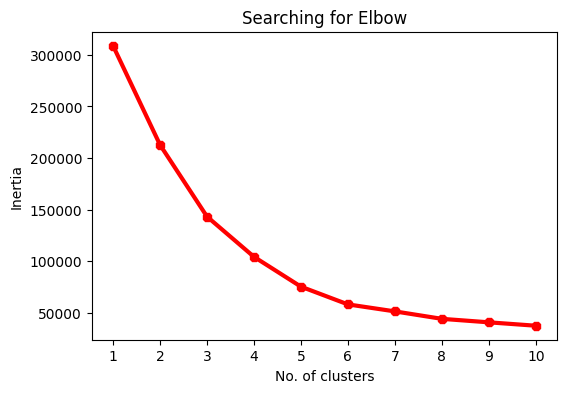

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X3)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X3, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.3320
Với n_clusters = 3, Điểm trung bình silhouette score là 0.3356
Với n_clusters = 4, Điểm trung bình silhouette score là 0.4055
Với n_clusters = 5, Điểm trung bình silhouette score là 0.3576
Với n_clusters = 6, Điểm trung bình silhouette score là 0.4156
Với n_clusters = 7, Điểm trung bình silhouette score là 0.4420
Với n_clusters = 8, Điểm trung bình silhouette score là 0.4328
Với n_clusters = 9, Điểm trung bình silhouette score là 0.4093
Với n_clusters = 10, Điểm trung bình silhouette score là 0.3968


Chọn Cluster = 6 dựa trên 2 phương pháp Elbow và Silhouete

In [ ]:
km = KMeans(n_clusters=6)
km.fit(X3)
y = km.predict(X3)
X3['Label'] = y
X3.head()

<ipython-input-287-b620022f6ea2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Annual Income (k$)  Spending Score (1-100)  Label
0   19                  15                      39      4
1   21                  15                      81      3
2   20                  16                       6      4
3   23                  16                      77      3
4   31                  17                      40      4

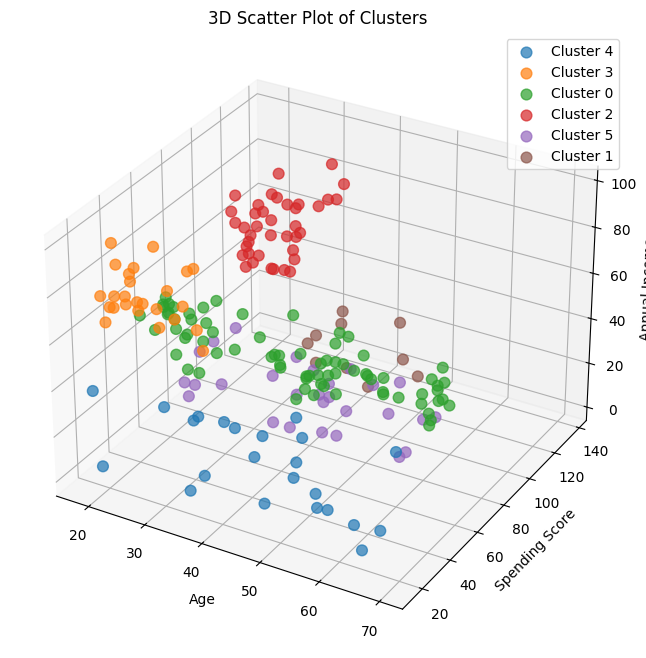

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X3['Label'].unique():
    cluster_data = X3[X3['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        cluster_data.iloc[:, 2],
        label=f'Cluster {label}',
        s=60, alpha=0.7
    )
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()

Nổi bật nhất là Nhóm Đỏ: Độ tuổi từ 20 - 30 tuổi, thu nhập hằng năm từ 20 - 80K với Spending Score gần như max



In [ ]:
import plotly.express as px

# Create a dynamic 3D scatter plot
fig = px.scatter_3d(
    X3,  # DataFrame containing your data
    x=X3.columns[0],  # Replace with your actual column for x-axis, e.g., 'Age'
    y=X3.columns[1],  # Replace with your column for y-axis, e.g., 'Annual Income'
    z=X3.columns[2],  # Replace with your column for z-axis, e.g., 'Spending Score'
    color='Label',    # Cluster labels for coloring
    title='3D Scatter Plot of Clusters',
    labels={
        X3.columns[0]: 'Age',
        X3.columns[1]: 'Annual Income',
        X3.columns[2]: 'Spending Score'
    },
    opacity=0.7,  # Set transparency of points
    size_max=10,  # Adjust point size scaling
)

# Update the layout for better viewing
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for clean visuals
)

# Show the interactive plot
fig.show()


## 4 - Conclusion and Recommendations

## 4.1 - Conclusion

*   Spending Score cao (>60) tập trung ở nhóm có thu nhập tiệm cận 25K và trên 75K. Ngoài ra Score cao cũng tập trung ở nhóm tuổi trước 40
*   Spending Score trung bình (40 - 60) tập trung ở nhóm có thu nhập trên 50K và dưới 75K và tuổi rải đều từ 20 đến 60, có điểm tập trung ở khoảng 40 tuổi
---
*   Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng cao là: 64.194K/Year, với độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng cao là: 30.03
*   Thu nhập trung bình hàng năm của khách hàng có điểm tiêu dùng trong khoảng 40 - 60: 54.608K/Year, với độ tuổi trung bình của nhóm khách hàng có điểm tiêu dùng thấp (<40) là: 42.64
---
*   Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 20 đến 30: 55.240K/Year
*   Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 31 đến 40: 68.633K/Year
*   Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 41 đến 50: 63.605K/Year
*   Thu nhập trung bình hàng năm của khách hàng có độ tuổi từ 51 đến 60: 56.696K/Year

*   Thu nhập trung bình hàng năm của khách hàng có độ tuổi trên 60: 50.000K/Year
---
*   Tỷ trọng Khách hàng Nữ trong Dataset là 56%, Khách hàng Nam trong Dataset là 44%
*   Thu nhập trung bình hằng năm của Nam (62.22K) cao hơn so với Nữ (59.25K)
*   Điểm tiêu dùng của Nữ xấp xỉ (51.52) và cao hơn so với điểm tiêu dùng của Nam (48.51)




## 4.2 - Recommendations

*   Tạo ra các chương trình ưu đãi giảm giá thường xuyên và chương trình giữ chân cho nhóm Khách hàng trẻ (Từ 20 - 30 tuổi, điểm tiêu dùng trên 60) dựa trên các sản phẩm mà nhóm này thường xuyên mua
*   Với nhóm khách hàng trung niên (Độ tuổi từ 40 - 60) và điểm tiêu dùng trong ngưỡng 40 - 60, nghiên cứu thêm về sản phẩm nhóm này quan tâm và các dịp nhóm này mua sắm nhiều nhất
*   Tiếp tục theo dõi và thu thập thêm thông tin bằng khảo sát cho nhóm khách hàng từ độ tuổi 40 - 60 và có điểm tiêu dùng từ 60 trở lên



# B - Shop Dataset (Bắt đầu làm sau khi xong Mall Dataset)

## 1 - Import Packages

In [ ]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from statsmodels.formula.api import ols

# For saving models
import pickle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datascientistanna/customers-dataset")

print("Path to dataset files:", path)

100%|██████████| 23.2k/23.2k [00:00<00:00, 10.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv')

In [ ]:
df.head(5)

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Cột Profession (Nghề nghiệp) có các giá trị Null => Bỏ các giá trị Null

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [ ]:
df.describe()

CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  1965.000000  1965.000000        1965.000000             1965.000000   
mean   1000.309924    48.894656      110616.009669               51.078880   
std     578.443714    28.414889       45833.860195               27.977176   
min       1.000000     0.000000           0.000000                0.000000   
25%     498.000000    25.000000       74350.000000               28.000000   
50%    1000.000000    48.000000      109759.000000               50.000000   
75%    1502.000000    73.000000      149095.000000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      1965.000000  1965.000000  
mean          4.092621     3.757252  
std           3.926459     1.968335  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

In [ ]:
df.duplicated().sum()

0

1 số note khi điều tra sơ bộ:
*   Customer ID không cần dùng để đem vào điều tra dữ liệu sâu hơn
*   Biến đổi trường Gender thành nhị phân để sau dễ phân tích (0: Female, 1: Male)
*   Độ tuổi trung bình của Khách hàng trong Dataset là 48.89
*   Thu nhập trung bình hằng nam của Khách hàng là 110.616K/Năm
*   Điêm tiêu dùng trung bình của Khách hàng là 51.07
*   Số năm kinh nghiệm làm việc trung bình của Khách hàng là 4.09 năm
*   Số lượng người trong gia đình trung bình của Khách hàng là 3.75 người








## 2 - EDA

### 2.1 - Check Outlier

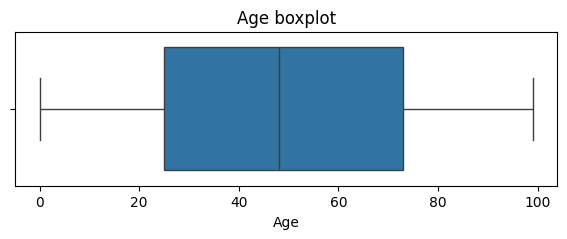

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Age'])
plt.title('Age boxplot')
plt.show()

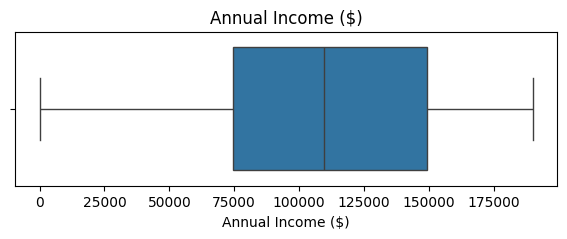

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Annual Income ($)'])
plt.title('Annual Income ($)')
plt.show()

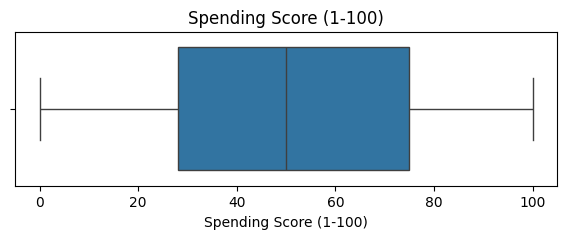

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')
plt.show()

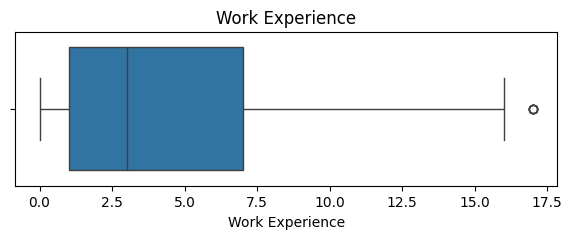

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Work Experience'])
plt.title('Work Experience')
plt.show()

Có 1 phần nhỏ phân bổ là những Khách hàng có số năm kinh nghiệp từ 1 đến hơn 2.5 năm

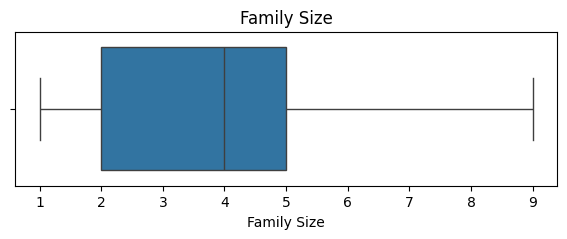

In [ ]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['Family Size'])
plt.title('Family Size')
plt.show()

### 2.2 - Detailed EDA 1

In [ ]:
# Chuyển Categorical thành Numberic Data
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

<ipython-input-15-c94c312021b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [ ]:
# Check tỷ trọng giới tính
import plotly.express as px

gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.pie(gender_counts,
             names='Gender',
             values='Count',
             title='Pie Chart of Customers by Gender',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Gender: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

Tỷ trọng KH nữ trội hơn so với KH Nam

Điều tra thêm về phân bổ của các yếu tố: Tuổi, Thu nhập hằng năm, Điểm chi tiêu, lượng người trong gia đình, số lượng người theo nghề nghiệp

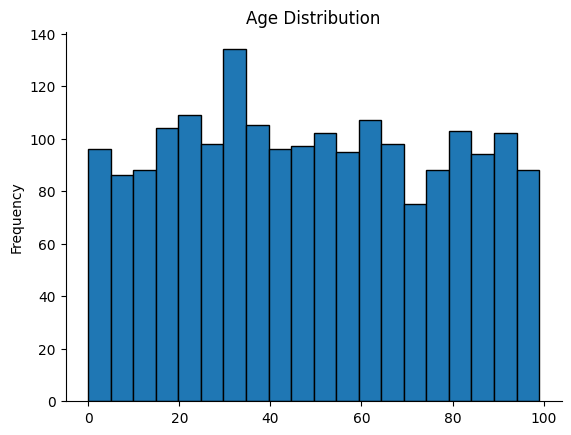

In [ ]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

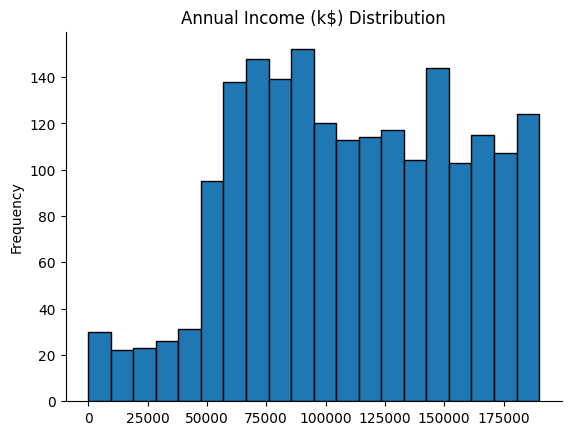

In [ ]:
from matplotlib import pyplot as plt
df['Annual Income ($)'].plot(kind='hist', bins=20, title='Annual Income (k$) Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

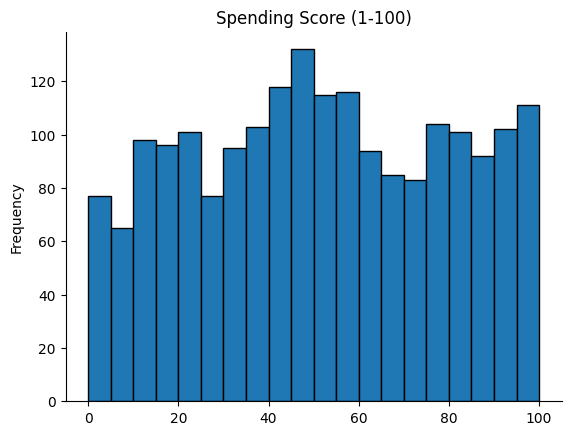

In [ ]:
from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
work_counts = df['Work Experience'].value_counts().reset_index()
work_counts.columns = ['Work Experience', 'Count']

fig = px.pie(work_counts,
             names='Work Experience',
             values='Count',
             title='Pie Chart of Customers by Work Experience',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Work Experience: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

Phần lớn KH trong Dataset có kinh nghiệm làm việc từ 0 - 1 năm là chủ yếu, tiếp đó là những KH có 8-9 năm kinh nghiệm làm việc

In [ ]:
family_counts = df['Family Size'].value_counts().reset_index()
family_counts.columns = ['Family Size', 'Count']

fig = px.pie(family_counts,
             names='Family Size',
             values='Count',
             title='Pie Chart of Customers by Family Size',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Family Size: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

In [ ]:
profession_counts = df['Profession'].value_counts().reset_index()
profession_counts.columns = ['Profession', 'Count']

fig = px.pie(profession_counts,
             names='Profession',
             values='Count',
             title='Pie Chart of Customers by Profession',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Profession: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

3 ngành công việc đứng đầu mà KH hay làm trong Dataset lần lượt là: Artist, Healthcare và Entertainment => Có thể điều tra sâu thêm về mức lương theo ngành nghề

### 2.3 - Detailed EDA 2

In [ ]:
fig = px.histogram(df,
                   x='Profession',
                   color='Gender',
                   barmode='group',  # Group bars by category (like Seaborn's `multiple='dodge'`)
                   title='Profession by Gender',
                   text_auto=True)  # Show counts on the bars
fig.update_layout(
    xaxis_title='Profession',
    yaxis_title='Count',
    bargap=0.2,  # Adjust space between bars
    legend_title='Gender'
)
fig.show()

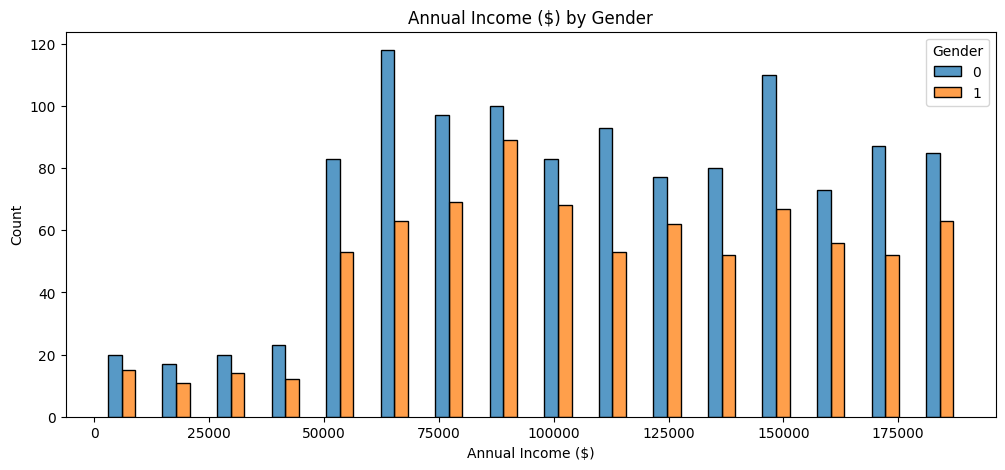

In [ ]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['Annual Income ($)'], hue=df['Gender'], multiple='dodge', shrink=0.5)
plt.title('Annual Income ($) by Gender')
plt.show()

Theo Chart, trong mọi nghề nghiệp và thu nhập thì KH Nữ luôn trội hơn Nam => Sẽ có thể bị bias vì thế nên thu thập thêm Data về sau để tránh bias

#### 2.3.1 - EDA by Gender

KH Nam và Nữ đều có phân bổ tương tự như phân bổ của toàn bộ Dataset, ngoài ra cũng chưa thấy được sự khác biệt rõ ràng giữa KH Nam và KH Nữ

##### 2.3.1.1 - Women

In [ ]:
# Filter Women Only (Gender = 0)
df1 = df[df['Gender'] == 0]

In [ ]:
df1 = df1.drop(columns=["CustomerID"])

In [ ]:
df1.describe()

Gender          Age  Annual Income ($)  Spending Score (1-100)  \
count  1166.0  1166.000000        1166.000000             1166.000000   
mean      0.0    48.906518      110434.875643               50.993139   
std       0.0    28.229544       45976.146050               28.109075   
min       0.0     0.000000        1000.000000                0.000000   
25%       0.0    25.000000       72912.000000               28.000000   
50%       0.0    48.000000      111174.000000               50.000000   
75%       0.0    72.750000      148603.750000               75.750000   
max       0.0    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      1166.000000  1166.000000  
mean          4.036021     3.760720  
std           3.893263     1.973699  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     8.000000

Vẽ thêm các Histogram khác để xem sự phân bổ của các biến

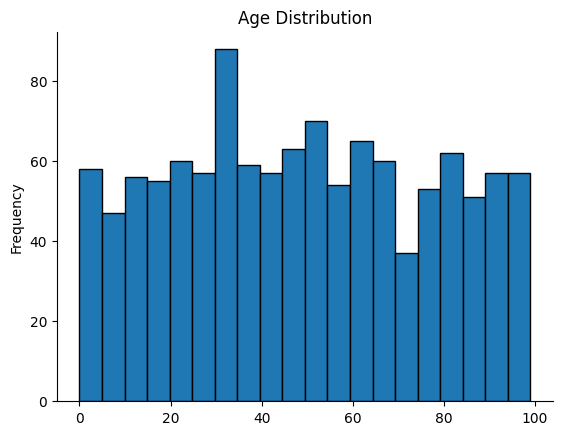

In [ ]:
df1['Age'].plot(kind='hist', bins=20, title='Age Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

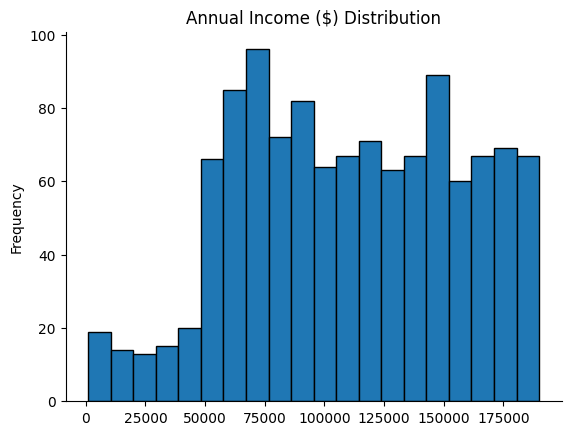

In [ ]:
df1['Annual Income ($)'].plot(kind='hist', bins=20, title='Annual Income ($) Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

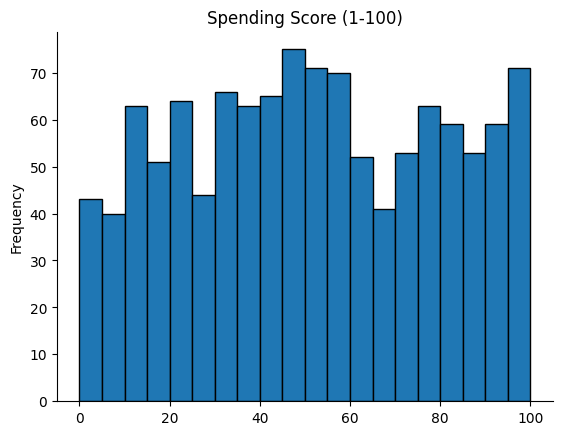

In [ ]:
df1['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
profession_counts = df1['Profession'].value_counts().reset_index()
profession_counts.columns = ['Profession', 'Count']

fig = px.pie(profession_counts,
             names='Profession',
             values='Count',
             title='Pie Chart of Customers by Profession',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Profession: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

##### 2.3.1.2 - Men

In [ ]:
# Filter Men Only (Gender = 0)
df2 = df[df['Gender'] == 1]

In [ ]:
df2 = df2.drop(columns=["CustomerID"])

In [ ]:
df2.describe()

Gender         Age  Annual Income ($)  Spending Score (1-100)  \
count   799.0  799.000000         799.000000              799.000000   
mean      1.0   48.877347      110880.342929               51.204005   
std       0.0   28.700947       45652.889208               27.800663   
min       1.0    0.000000           0.000000                1.000000   
25%       1.0   24.000000       76771.000000               28.000000   
50%       1.0   48.000000      107879.000000               51.000000   
75%       1.0   74.000000      149651.500000               75.000000   
max       1.0   99.000000      189945.000000              100.000000   

       Work Experience  Family Size  
count       799.000000   799.000000  
mean          4.175219     3.752190  
std           3.975405     1.961705  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           8.000000     5.000000  
max          17.000000     9.000000

Note thêm 1 chút

Vẽ thêm Histogram để xem phân bổ

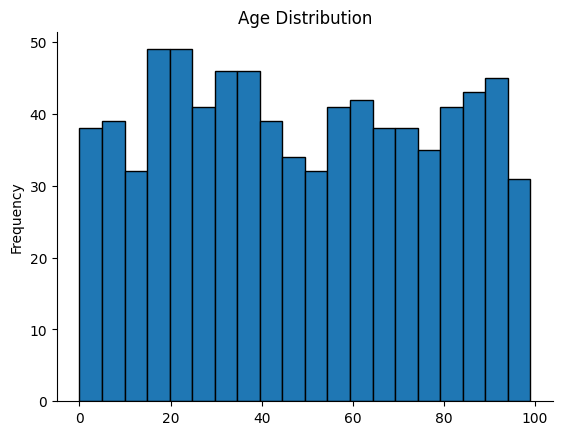

In [ ]:
df2['Age'].plot(kind='hist', bins=20, title='Age Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

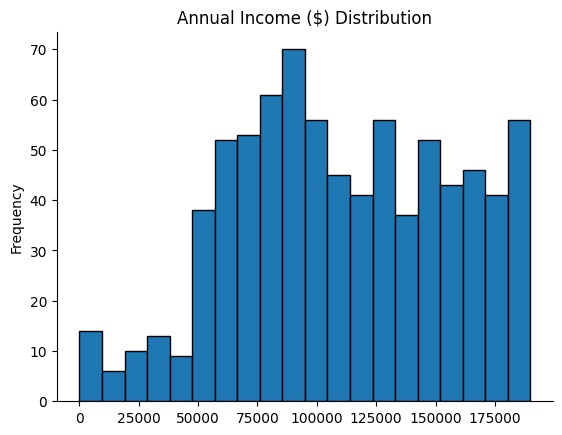

In [ ]:
df2['Annual Income ($)'].plot(kind='hist', bins=20, title='Annual Income ($) Distribution', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

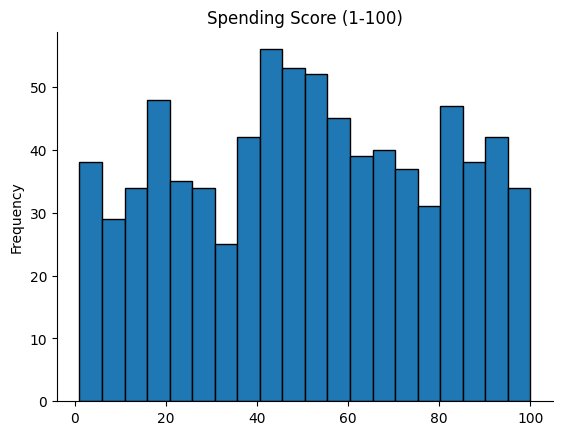

In [ ]:
df2['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
profession_counts = df2['Profession'].value_counts().reset_index()
profession_counts.columns = ['Profession', 'Count']

fig = px.pie(profession_counts,
             names='Profession',
             values='Count',
             title='Pie Chart of Customers by Profession',
             hover_data={'Count': True})

fig.update_traces(textinfo='percent+label',  # Show percentages and labels
                  hovertemplate='Profession: %{label}<br>Count: %{value}<br>Percentage: %{percent}')
fig.show()

#### 2.3.2 - EDA by Profession

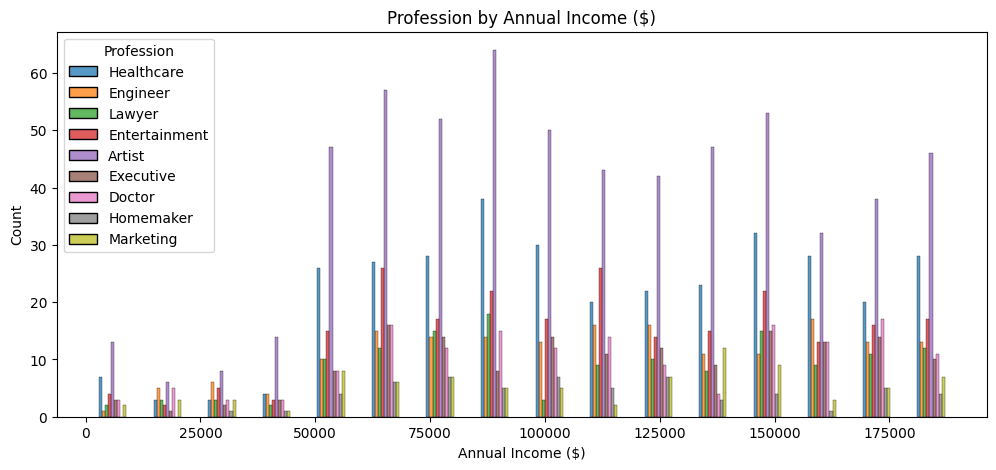

In [ ]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['Annual Income ($)'], hue=df['Profession'], multiple='dodge', shrink=0.5)
plt.title('Profession by Annual Income ($)')
plt.show()

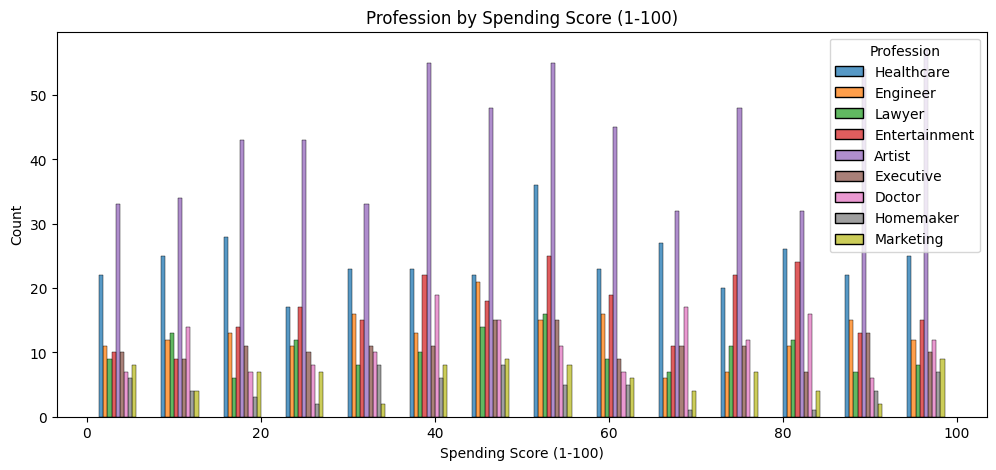

In [ ]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['Spending Score (1-100)'], hue=df['Profession'], multiple='dodge', shrink=0.6)
plt.title('Profession by Spending Score (1-100)')
plt.show()

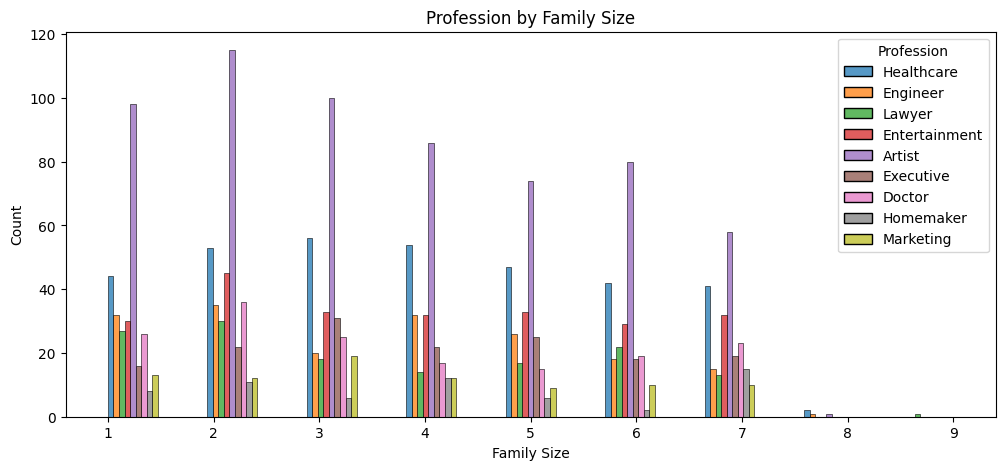

In [ ]:
# Histogram
plt.figure(figsize=(12,5))
ax = sns.histplot(x=df['Family Size'], hue=df['Profession'], multiple='dodge', shrink=1)
plt.title('Profession by Family Size')
plt.show()

### 2.4 - Correlation Heatmap

In [ ]:
df['Profession'].value_counts(normalize = True)*100

Profession
Artist           31.145038
Healthcare       17.251908
Entertainment    11.908397
Engineer          9.109415
Doctor            8.193384
Executive         7.786260
Lawyer            7.226463
Marketing         4.325700
Homemaker         3.053435
Name: proportion, dtype: float64

In [ ]:
# Chuyển Categorical thành Numberic Data
df['Profession'] = df['Profession'].replace({'Artist':1,'Healthcare':2,'Entertainment':3,'Engineer':4,'Doctor':5,'Executive':6,'Lawyer':7,'Marketing':8,'Homemaker':9})

<ipython-input-43-211837bd5fb7>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



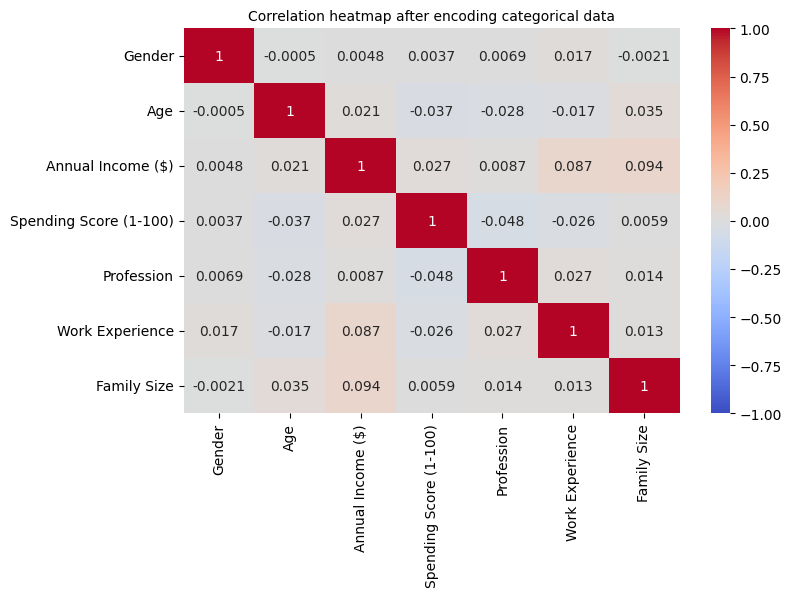

In [ ]:
# Calculate correlation and plot heatmap
df = df.drop(columns=["CustomerID"])
plt.figure(figsize=(8,5))
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

Không thấy có sự tương quan mạnh nào (> 0.5) giữa các biến với nhau

## 3 - Clustering

### 3.1 - Clustering by 2 Factors

#### 3.1.1 - Clustering by Age and Spending Score

In [ ]:
from sklearn.cluster import KMeans
X00 = df[['Age' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X00)
    inertia.append(algorithm.inertia_)

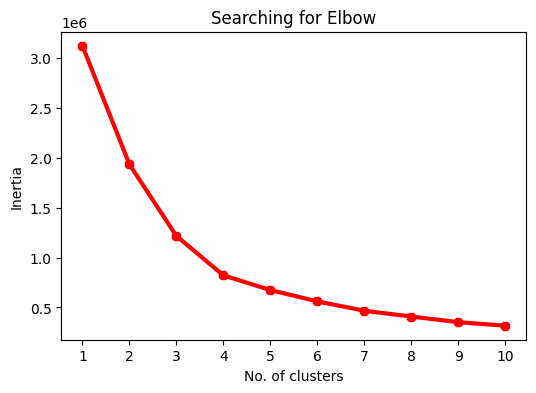

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=6)
km.fit(X00)
y = km.predict(X00)
X00['Label'] = y
X00.head()

<ipython-input-74-9efce7080027>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Spending Score (1-100)  Label
0   19                      39      2
1   21                      81      5
2   20                       6      2
3   23                      77      5
4   31                      40      2

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

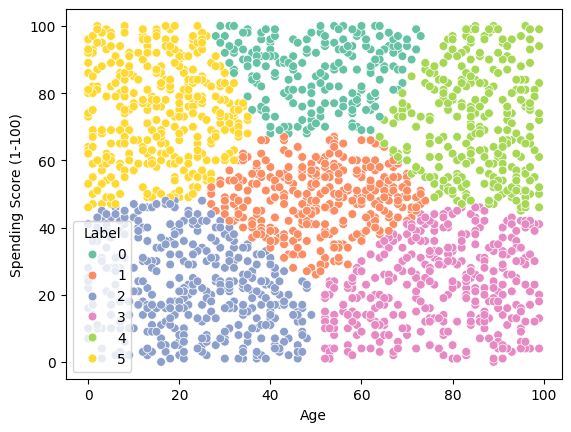

In [ ]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X00, hue='Label', s=40, palette='Set2')

#### 3.1.2 - Clustering by Annual Income and Spending Score

In [ ]:
from sklearn.cluster import KMeans
X0 = df[['Annual Income ($)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X0)
    inertia.append(algorithm.inertia_)

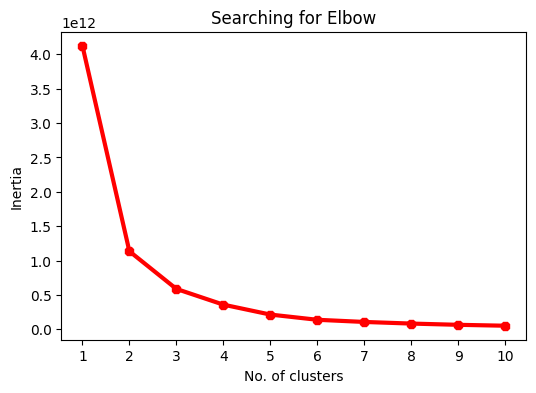

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X0)
y = km.predict(X0)
X0['Label'] = y
X0.head()

<ipython-input-51-93ffb07a2efd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Annual Income ($)  Spending Score (1-100)  Label
0              15000                      39      2
1              35000                      81      2
2              86000                       6      3
3              59000                      77      1
4              38000                      40      2

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income ($)'>

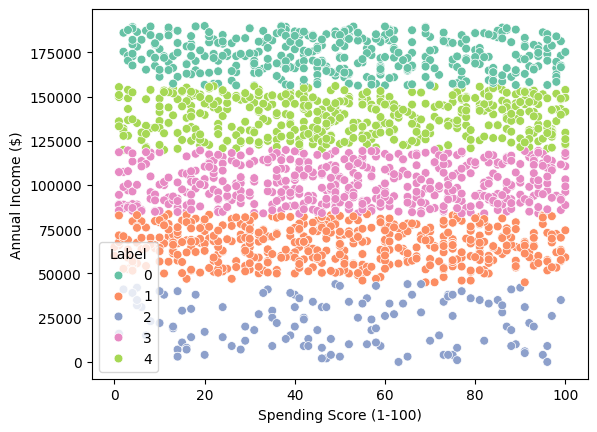

In [ ]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income ($)', data=X0, hue='Label', s=40, palette='Set2')

Chưa có dấu hiệu Clustering rõ ràng ra được thành các tệp khác nhau => Sang thử Clustering với 3 điều kiện trở lên

### 3.2 - Clustering by 3 Factors

Clustering dùng 3 yếu tố cũng có dấu hiệu tương tự như trên

#### 3.2.1 - Clustering by Age, Annual Income & Spending Score

*   Chia ra theo 1: Tuổi, Thu nhập hằng năm, Điểm tiêu dùng
*   Chia ra theo 2: Số người trong gia đình, Thu nhập hằng năm, Điểm tiêu dùng
*   Chia ra theo 3: Tuổi, Số người trong gia đình, Thu nhập hằng năm

In [ ]:
from sklearn.cluster import KMeans
X1 = df[['Age','Annual Income ($)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

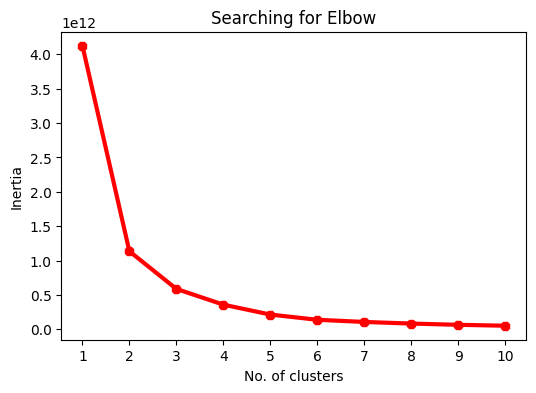

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X1)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.6189
Với n_clusters = 3, Điểm trung bình silhouette score là 0.5575
Với n_clusters = 4, Điểm trung bình silhouette score là 0.5333
Với n_clusters = 5, Điểm trung bình silhouette score là 0.5612
Với n_clusters = 6, Điểm trung bình silhouette score là 0.5695
Với n_clusters = 7, Điểm trung bình silhouette score là 0.5524
Với n_clusters = 8, Điểm trung bình silhouette score là 0.5478
Với n_clusters = 9, Điểm trung bình silhouette score là 0.5511
Với n_clusters = 10, Điểm trung bình silhouette score là 0.5502


In [ ]:
km = KMeans(n_clusters=5)
km.fit(X1)
y = km.predict(X1)
X1['Label'] = y
X1.head()

<ipython-input-57-7b3fe0452c73>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Annual Income ($)  Spending Score (1-100)  Label
0   19              15000                      39      4
1   21              35000                      81      4
2   20              86000                       6      2
3   23              59000                      77      0
4   31              38000                      40      4

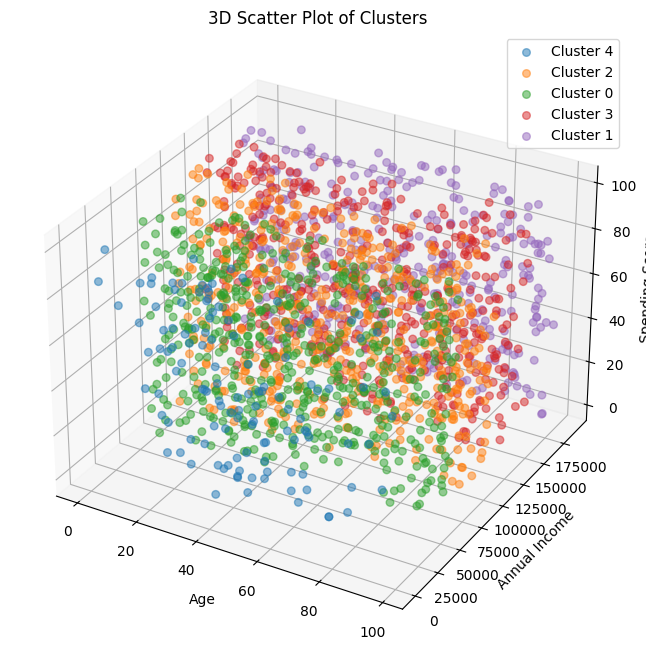

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X1['Label'].unique():
    cluster_data = X1[X1['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        cluster_data.iloc[:, 2],
        label=f'Cluster {label}',
        s=30, alpha=0.5
    )
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Create a dynamic 3D scatter plot
fig = px.scatter_3d(
    X1,  # DataFrame containing your data
    x=X1.columns[0],  # Replace with your actual column for x-axis, e.g., 'Age'
    y=X1.columns[1],  # Replace with your column for y-axis, e.g., 'Annual Income'
    z=X1.columns[2],  # Replace with your column for z-axis, e.g., 'Spending Score'
    color='Label',    # Cluster labels for coloring
    title='3D Scatter Plot of Clusters',
    labels={
        X1.columns[0]: 'Age',
        X1.columns[1]: 'Annual Income',
        X1.columns[2]: 'Spending Score'
    },
    opacity=0.7,  # Set transparency of points
    size_max=10,  # Adjust point size scaling
)

# Update the layout for better viewing
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for clean visuals
)

# Show the interactive plot
fig.show()


#### 3.2.2 - Clustering by Family size, Annual Income, Spending Score

In [ ]:
from sklearn.cluster import KMeans
X2 = df[['Family Size','Annual Income ($)' , 'Spending Score (1-100)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



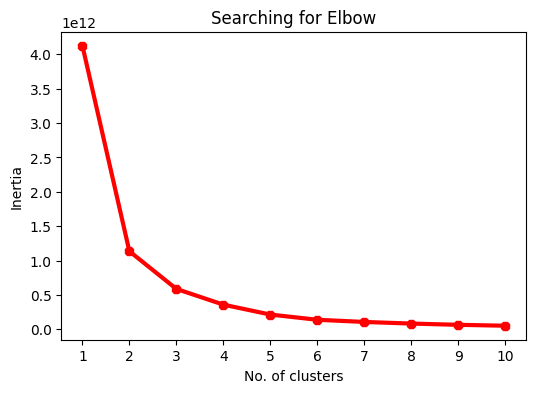

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X2)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.6189
Với n_clusters = 3, Điểm trung bình silhouette score là 0.5575
Với n_clusters = 4, Điểm trung bình silhouette score là 0.5333
Với n_clusters = 5, Điểm trung bình silhouette score là 0.5612
Với n_clusters = 6, Điểm trung bình silhouette score là 0.5696
Với n_clusters = 7, Điểm trung bình silhouette score là 0.5524
Với n_clusters = 8, Điểm trung bình silhouette score là 0.5479
Với n_clusters = 9, Điểm trung bình silhouette score là 0.5512
Với n_clusters = 10, Điểm trung bình silhouette score là 0.5503


In [ ]:
km = KMeans(n_clusters=5)
km.fit(X2)
y = km.predict(X2)
X2['Label'] = y
X2.head()

<ipython-input-82-5af1be1d0ef4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Family Size  Annual Income ($)  Spending Score (1-100)  Label
0            4              15000                      39      1
1            3              35000                      81      1
2            1              86000                       6      3
3            2              59000                      77      2
4            6              38000                      40      1

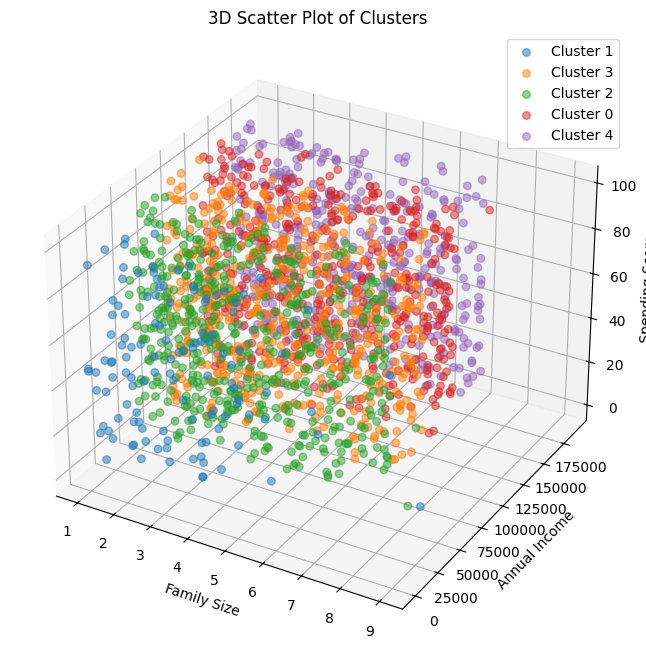

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X2['Label'].unique():
    cluster_data = X2[X2['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        cluster_data.iloc[:, 2],
        label=f'Cluster {label}',
        s=30, alpha=0.5
    )
ax.set_xlabel('Family Size')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Create a dynamic 3D scatter plot
fig = px.scatter_3d(
    X2,  # DataFrame containing your data
    x=X2.columns[0],  # Replace with your actual column for x-axis, e.g., 'Age'
    y=X2.columns[1],  # Replace with your column for y-axis, e.g., 'Annual Income'
    z=X2.columns[2],  # Replace with your column for z-axis, e.g., 'Spending Score'
    color='Label',    # Cluster labels for coloring
    title='3D Scatter Plot of Clusters',
    labels={
        X2.columns[0]: 'Family Size',
        X2.columns[1]: 'Annual Income',
        X2.columns[2]: 'Spending Score'
    },
    opacity=0.7,  # Set transparency of points
    size_max=10,  # Adjust point size scaling
)

# Update the layout for better viewing
fig.update_layout(
    scene=dict(
        xaxis_title='Family Size',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for clean visuals
)

# Show the interactive plot
fig.show()


#### 3.2.3 - Clustering by Age, Family Size & Annual Income

In [ ]:
from sklearn.cluster import KMeans
X3 = df[['Age','Family Size','Annual Income ($)']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1418: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



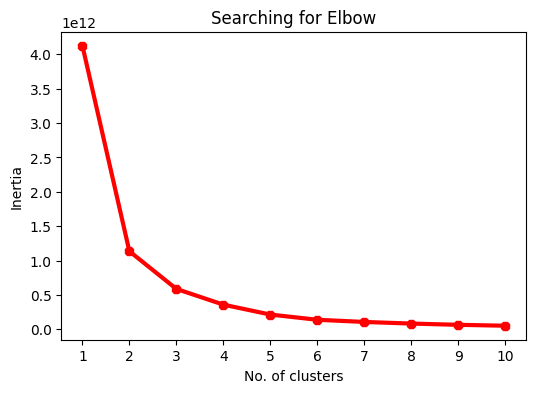

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
silhouette_scores = []
inertia = []
range_clusters = range(2, 11)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X3)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X3, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Với n_clusters = {n_clusters}, Điểm trung bình silhouette score là {silhouette_avg:.4f}")

Với n_clusters = 2, Điểm trung bình silhouette score là 0.6189
Với n_clusters = 3, Điểm trung bình silhouette score là 0.5575
Với n_clusters = 4, Điểm trung bình silhouette score là 0.5333
Với n_clusters = 5, Điểm trung bình silhouette score là 0.5612
Với n_clusters = 6, Điểm trung bình silhouette score là 0.5696
Với n_clusters = 7, Điểm trung bình silhouette score là 0.5524
Với n_clusters = 8, Điểm trung bình silhouette score là 0.5479
Với n_clusters = 9, Điểm trung bình silhouette score là 0.5512
Với n_clusters = 10, Điểm trung bình silhouette score là 0.5503


In [ ]:
km = KMeans(n_clusters=5)
km.fit(X3)
y = km.predict(X3)
X3['Label'] = y
X3.head()

<ipython-input-71-02f0c7a75144>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age  Family Size  Annual Income ($)  Label
0   19            4              15000      3
1   21            3              35000      3
2   20            1              86000      2
3   23            2              59000      0
4   31            6              38000      3

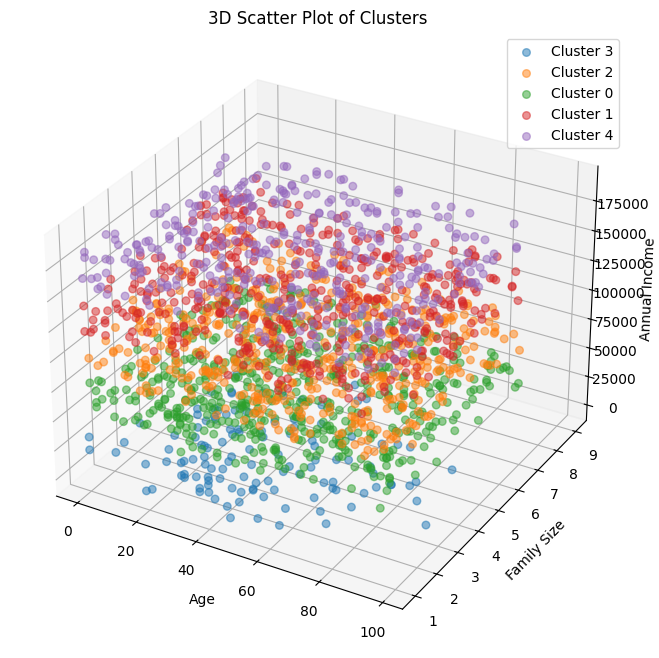

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X3['Label'].unique():
    cluster_data = X3[X3['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],
        cluster_data.iloc[:, 1],
        cluster_data.iloc[:, 2],
        label=f'Cluster {label}',
        s=30, alpha=0.5
    )
ax.set_xlabel('Age')
ax.set_ylabel('Family Size')
ax.set_zlabel('Annual Income')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Create a dynamic 3D scatter plot
fig = px.scatter_3d(
    X3,  # DataFrame containing your data
    x=X3.columns[0],  # Replace with your actual column for x-axis, e.g., 'Age'
    y=X3.columns[1],  # Replace with your column for y-axis, e.g., 'Annual Income'
    z=X3.columns[2],  # Replace with your column for z-axis, e.g., 'Spending Score'
    color='Label',    # Cluster labels for coloring
    title='3D Scatter Plot of Clusters',
    labels={
        X3.columns[0]: 'Age',
        X3.columns[1]: 'Family Size',
        X3.columns[2]: 'Annual Income'
    },
    opacity=0.7,  # Set transparency of points
    size_max=10,  # Adjust point size scaling
)

# Update the layout for better viewing
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Family Size',
        zaxis_title='Annual Income'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Set margins for clean visuals
)

# Show the interactive plot
fig.show()


## 4 - Conclusion & Recommendations

### 4.1 - Conclusion

*   Thu nhập trung bình hằng năm của Khách hàng là 110.616K/Năm

*   Điêm tiêu dùng trung bình của Khách hàng là 51.07

*   Số năm kinh nghiệm làm việc trung bình của Khách hàng là 4.09
---
*   Phần lớn KH trong Dataset có kinh nghiệm làm việc từ 0 - 1 năm là chủ yếu, tiếp đó là những KH có 8-9 năm kinh nghiệm làm việc

*   3 ngành công việc đứng đầu mà KH hay làm và có mức lương cao nhất trong Dataset lần lượt là: Artist, Healthcare và Entertainment


---


*   Theo Chart, trong mọi nghề nghiệp và thu nhập thì KH Nữ luôn trội hơn Nam => Sẽ có thể bị bias vì thế nên thu thập thêm Data về sau để tránh bias


*   Không thấy có sự tương quan mạnh nào (> 0.5) giữa các biến với nhau


*   Chưa có dấu hiệu Clustering rõ ràng ra được thành các tiêu chí khác nhau


### 4.2 - Recommendations

*   Thu thập thêm Data để tránh bị Bias quá về nhóm KH nữ (Mặc dù Dataset không Imbalanced)

*   Tiếp tục nghiên cứu hành vi của 3 nhóm ngành công việc đứng đầu Dataset (Artist, Healthcare, Entertainment)

*   Điều tra thêm về 2 nhóm KH có từ 0-1 năm làm việc và nhóm KH có từ 8-9 năm làm việc để quan sát rõ hành vi hơn